## Author# Ganesh Kale
## Project Milestone# 3
## Date# Oct 19, 2021

### Project Overview:

Project Overview:
House Prices in USA are booming, and house prices will continue to race ahead, at nearly twice the pace predicted before this year. This is what we hear or read when talk about housing market in USA. Buying house is very critical job, one should be aware of lots of things before buying house and when buying house nobody sure about when is the right time to buy house and wants to have some tool that would consider all the factors determining house price and predict the house price. Predicting the house price is challenging but doable and with help of machine learning algorithms this can be achieved.

This is the topic chosen for the final project to make data ready by collecting from different sources and cleaning, transforming, and merging all these data to make it final dataset in the ready format for machine learning algorithms so predicting house price model can be developed by training and validating on housing market dataset.
To build predicting house price model, we should consider different factors such as house information, and facilities available in neighborhood such school, hospitals etc.
As part of this exercise, Austin, Texas housing market data will be collected from 3 difference sources such as csv file with house related information, json file for hospital in neighborhood and tabular data for school information from website.

2. Tabular data – The neighborhood school information will be pulled from below websites, since the first website has school information such as address, type of school, student per teacher ratio etc. but does not have information such ratings, score etc. for that we are going to use second source of tabular data, and both will be merged together. 

Links to data – 
https://www.schooldigger.com/go/TX/city/Austin/search.aspx

### Tabular data from website – School Information:
The school information is one of the key factors that drives house price, so we are collecting it from above website wherein table is provides with school information.

1. address - street address of school
2. zip code – Zip code of school
3. Name. – School Name
4. Type – Type of school such as public or charter
5. Enrollment - Total students enrolled in a year
6. Full-time Teachers - Count of Full-time Teachers
7. Student/Teacher Ratio - How many students per teacher
8. Free/DiscountedLunch Recipients - Percentage of Free/DiscountedLunch Recipients students
9. Race Info - WHat are different races of students
10. State wide Ranks and Percentile - what is the school rank statewide for different years
11. Per Pupil Expenditures details - average cost of student and distribution of fed and state funds

#### _import required packages_

In [2]:
import numpy as np  # for numeric operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization
import random   # for generating random numbers

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# import packages required for webscraping

import requests
from bs4 import BeautifulSoup

In [249]:
# html page path

url = "https://www.schooldigger.com/go/TX/city/Austin/search.aspx"

 # access the web page
    
page = requests.get(url)  

# create bs object of html page by parsing it

soup = BeautifulSoup(page.text, 'lxml')

In [250]:
# find the table 

table = soup.find('table',{'id':'tabSchooList'})

In [251]:
# find the headers of the table

headers = table1.thead.find_all('tr')

In [252]:
# store  headers in the list

main_headers = headers[1]     # first headers are just 'school' so ignoring it

# find all the headers from main_headers and remove new line chars and store in list

main_headers_names = [head.get_text().strip().replace('\xa0',' ') for head in main_headers.findAll('th')]

In [256]:
# clean the headers and display headers details

table_headers = [head.replace('\r\n                            ','').strip() for head in main_headers_names]

table_headers

['Name',
 'Type',
 'Grades',
 'Address',
 'City',
 'Zip',
 'County',
 'District',
 'Is Charter',
 'Is Magnet',
 'Is Virtual',
 'Is Title I',
 'Phone',
 'Enrollment',
 'Full-time Teachers',
 'Student/Teacher Ratio',
 'Free/DiscountedLunch Recipients',
 'White',
 'Black',
 'Hispanic',
 'Asian',
 'AmericanIndian',
 'PacificIslander',
 'Two orMore Races',
 'Average Standard Score (2021)',
 'Statewide Rank (2021)',
 'State Percentile (2021)',
 'SchoolDigger Rating (2021)',
 'Average Standard Score (2019)',
 'Statewide Rank (2019)',
 'State Percentile (2019)',
 'Rank Change from Previous Year',
 'STAAR Spanish Reading 3rdGrade',
 'STAAR Spanish Reading 4thGrade',
 'STAAR Spanish Reading 5thGrade',
 'STAAR Spanish Writing 4thGrade',
 'STAAR Spanish Mathematics 3rdGrade',
 'STAAR Spanish Mathematics 4thGrade',
 'STAAR Spanish Mathematics 5thGrade',
 'STAAR Spanish Science 5thGrade',
 'STAAR EOC Algebra I EndofCourse',
 'STAAR EOC Biology EndofCourse',
 'STAAR EOC English I Reading EndofCourse'

In [258]:
# find all the data from each row

data = table.tbody.find_all('tr')

# using list comprehension get data from each rows for each column and store in nested list

rows = [[td.get_text().strip().encode("ascii", "ignore").decode() for td in tr.find_all('td')] for tr in data]

# display sample row details

rows[:2][0]

['Rooster Springs Elementary',
 'Public',
 'PK, KG-5',
 '1001 Belterra Dr',
 'Austin',
 '78737',
 'Hays County',
 'Dripping Springs Independent School District',
 'No',
 'No',
 '(n/a)',
 'No',
 '(512) 465-6200',
 '846',
 '53',
 '15.8',
 '3.2%',
 '613 (72.5%)',
 '12 (1.4%)',
 '156 (18.4%)',
 '20 (2.4%)',
 '1 (0.1%)',
 '2 (0.2%)',
 '42 (5.0%)',
 '85',
 '571st of 4554 public elementary  schools',
 '87.5%',
 '',
 '77.6',
 '789th of 4479 public elementary  schools',
 '82.4%',
 '218',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '64.0',
 '53.0',
 '59.0',
 '',
 '',
 '',
 '39.0',
 '',
 '43.0',
 '55.0',
 '57.0',
 '100.0',
 '',
 '',
 '44.0',
 '',
 '',
 '$8,247',
 '$580',
 '$7,667']

In [259]:
# save retrieved data in dataframe

school = pd.DataFrame(data=rows, columns=table_headers)

In [260]:
# display shape and head of new school data frame

school.shape
school.head()

(269, 65)

,Name,Type,Grades,Address,City,Zip,County,District,Is Charter,Is Magnet,...,STAAR Mathematics 5thGrade,STAAR Mathematics 6thGrade,STAAR Mathematics 7thGrade,STAAR Mathematics 8thGrade,STAAR Science 5thGrade,STAAR Science 8thGrade,STAAR Social Studies 8thGrade,Per Pupil Expenditures Total,Sub-total from Federal Funds,Sub-total from State/Local Funds
0,Rooster Springs Elementary,Public,"PK, KG-5",1001 Belterra Dr,Austin,78737,Hays County,Dripping Springs Independent School District,No,No,...,57.0,100.0,,,44.0,,,"$8,247",$580,"$7,667"
1,Sycamore Springs Elementary,Public,"PK, KG-5",14451 Sawyer Ranch Rd,Austin,78737,Hays County,Dripping Springs Independent School District,No,No,...,55.0,91.0,,,53.0,,,"$7,803",$616,"$7,187"
2,Sycamore Springs Middle,Public,6-9,14451 Sawyer Ranch Rd,Austin,78737,Hays County,Dripping Springs Independent School District,No,No,...,,75.0,50.0,69.0,,79.0,56.0,"$8,240",$550,"$7,689"
3,Texans Can Academy - Austin,"Public, Charter",9-12,2406 Rosewood Ave,Austin,78702,Travis County,Texans Can Academies,Yes,No,...,,,,,,,,"$11,570","$1,615","$9,954"
4,Wayside Eden Park Academy,"Public, Charter","PK, KG-5",6215 Menchaca Rd,Austin,78745,Travis County,Wayside Schools,Yes,No,...,35.0,,,,17.0,,,"$9,858",$827,"$9,031"


## Data Cleaning and Transformation

### 1. Update Headers

The data collected for school information have too many headers we do not need them so remove unwanted headers

In [261]:
# display all columns

school.columns

Index(['Name', 'Type', 'Grades', 'Address', 'City', 'Zip', 'County',
       'District', 'Is Charter', 'Is Magnet', 'Is Virtual', 'Is Title I',
       'Phone', 'Enrollment', 'Full-time Teachers', 'Student/Teacher Ratio',
       'Free/DiscountedLunch Recipients', 'White', 'Black', 'Hispanic',
       'Asian', 'AmericanIndian', 'PacificIslander', 'Two orMore Races',
       'Average Standard Score (2021)', 'Statewide Rank (2021)',
       'State Percentile (2021)', 'SchoolDigger Rating (2021)',
       'Average Standard Score (2019)', 'Statewide Rank (2019)',
       'State Percentile (2019)', 'Rank Change from Previous Year',
       'STAAR Spanish Reading 3rdGrade', 'STAAR Spanish Reading 4thGrade',
       'STAAR Spanish Reading 5thGrade', 'STAAR Spanish Writing 4thGrade',
       'STAAR Spanish Mathematics 3rdGrade',
       'STAAR Spanish Mathematics 4thGrade',
       'STAAR Spanish Mathematics 5thGrade', 'STAAR Spanish Science 5thGrade',
       'STAAR EOC Algebra I EndofCourse', 'STAAR EOC B

In [265]:
# remove unwanted headers

new_cols = [col for col in school.columns if not col.startswith('STAAR') and not col.startswith('Phone')]
new_cols

['Name',
 'Type',
 'Grades',
 'Address',
 'City',
 'Zip',
 'County',
 'District',
 'Is Charter',
 'Is Magnet',
 'Is Virtual',
 'Is Title I',
 'Enrollment',
 'Full-time Teachers',
 'Student/Teacher Ratio',
 'Free/DiscountedLunch Recipients',
 'White',
 'Black',
 'Hispanic',
 'Asian',
 'AmericanIndian',
 'PacificIslander',
 'Two orMore Races',
 'Average Standard Score (2021)',
 'Statewide Rank (2021)',
 'State Percentile (2021)',
 'SchoolDigger Rating (2021)',
 'Average Standard Score (2019)',
 'Statewide Rank (2019)',
 'State Percentile (2019)',
 'Rank Change from Previous Year',
 'Per Pupil Expenditures Total',
 'Sub-total from Federal Funds',
 'Sub-total from State/Local Funds']

In [266]:
# update school data set based on new columns

school = school[new_cols]

# display shape and head of new school data frame

school.shape
school.head()

(269, 34)

,Name,Type,Grades,Address,City,Zip,County,District,Is Charter,Is Magnet,...,Statewide Rank (2021),State Percentile (2021),SchoolDigger Rating (2021),Average Standard Score (2019),Statewide Rank (2019),State Percentile (2019),Rank Change from Previous Year,Per Pupil Expenditures Total,Sub-total from Federal Funds,Sub-total from State/Local Funds
0,Rooster Springs Elementary,Public,"PK, KG-5",1001 Belterra Dr,Austin,78737,Hays County,Dripping Springs Independent School District,No,No,...,571st of 4554 public elementary schools,87.5%,,77.6,789th of 4479 public elementary schools,82.4%,218,"$8,247",$580,"$7,667"
1,Sycamore Springs Elementary,Public,"PK, KG-5",14451 Sawyer Ranch Rd,Austin,78737,Hays County,Dripping Springs Independent School District,No,No,...,446th of 4554 public elementary schools,90.2%,,79.7,715th of 4479 public elementary schools,84.0%,269,"$7,803",$616,"$7,187"
2,Sycamore Springs Middle,Public,6-9,14451 Sawyer Ranch Rd,Austin,78737,Hays County,Dripping Springs Independent School District,No,No,...,134th of 2211 public middle schools,93.9%,,89,171st of 2193 public middle schools,92.2%,37,"$8,240",$550,"$7,689"
3,Texans Can Academy - Austin,"Public, Charter",9-12,2406 Rosewood Ave,Austin,78702,Travis County,Texans Can Academies,Yes,No,...,1784th of 1861 public high schools,4.1%,,5.3,1738th of 1857 public high schools,6.4%,46,"$11,570","$1,615","$9,954"
4,Wayside Eden Park Academy,"Public, Charter","PK, KG-5",6215 Menchaca Rd,Austin,78745,Travis County,Wayside Schools,Yes,No,...,2347th of 4554 public elementary schools,48.5%,,65.9,1231st of 4479 public elementary schools,72.5%,1116,"$9,858",$827,"$9,031"


### 2. Handle Missing Data

In [267]:
# identify missing values

school.isna().sum()

Name                                0
Type                                0
Grades                              0
Address                             0
City                                0
Zip                                 0
County                              0
District                            0
Is Charter                          0
Is Magnet                           0
Is Virtual                          0
Is Title I                          0
Enrollment                          0
Full-time Teachers                  0
Student/Teacher Ratio               0
Free/DiscountedLunch Recipients     0
White                               0
Black                               0
Hispanic                            0
Asian                               0
AmericanIndian                      0
PacificIslander                     0
Two orMore Races                    0
Average Standard Score (2021)       0
Statewide Rank (2021)               0
State Percentile (2021)             0
SchoolDigger

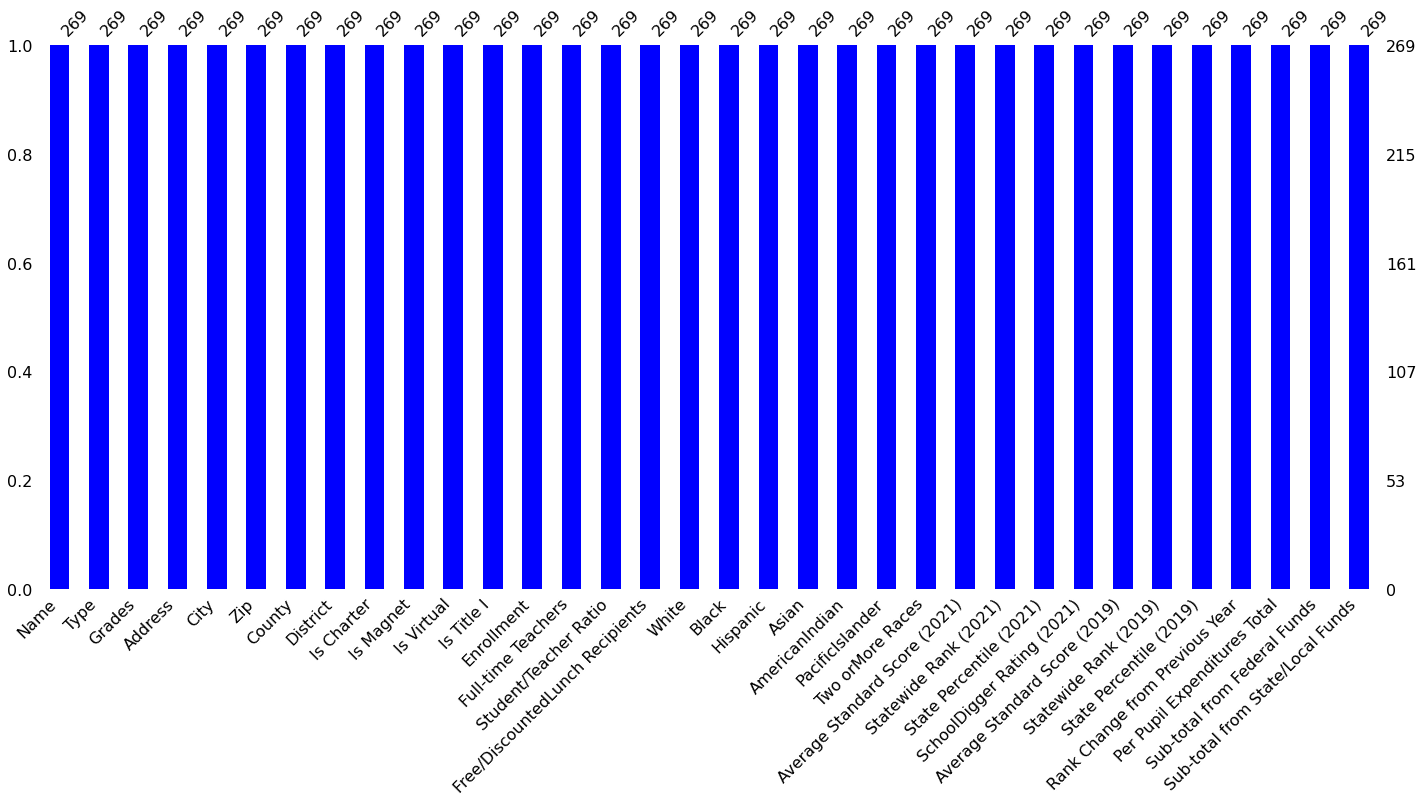

In [269]:
# display missing values

import missingno as msno

msno.bar(school, color='b');

# it seems there are no missing values

In [279]:
# it seem 'SchoolDigger Rating (2021)' feature have blank values

school['SchoolDigger Rating (2021)'].str.contains('').sum()

269

In [281]:
# drop column SchoolDigger Rating (2021) sinceit has only blank '' value

school.drop('SchoolDigger Rating (2021)',inplace=True,axis=1)

In [312]:
# display column having '(n/a)'  value

for col in school.columns:
    if school[col].str.contains('(n/a)').sum()>0:
        print(f"{col}:contains n/a values: {school[col].str.contains('(n/a)').sum()}");

Is Virtual:contains n/a values: 269
Rank Change from Previous Year:contains n/a values: 52


In [313]:
# remove these columns having (n/a) values

school.drop(['Is Virtual','Rank Change from Previous Year'],axis=1,inplace=True)

In [314]:
# display school head after droping column

school.head(2)

,Name,Type,Grades,Address,City,Zip,County,District,Is Charter,Is Magnet,...,Two orMore Races,Average Standard Score (2021),Statewide Rank (2021),State Percentile (2021),Average Standard Score (2019),Statewide Rank (2019),State Percentile (2019),Per Pupil Expenditures Total,Sub-total from Federal Funds,Sub-total from State/Local Funds
0,Rooster Springs Elementary,Public,"PK, KG-5",1001 Belterra Dr,Austin,78737,Hays County,Dripping Springs Independent School District,No,No,...,42 (5.0%),85,571st of 4554 public elementary schools,87.5%,77.6,789th of 4479 public elementary schools,82.4%,"$8,247",$580,"$7,667"
1,Sycamore Springs Elementary,Public,"PK, KG-5",14451 Sawyer Ranch Rd,Austin,78737,Hays County,Dripping Springs Independent School District,No,No,...,57 (6.1%),88.7,446th of 4554 public elementary schools,90.2%,79.7,715th of 4479 public elementary schools,84.0%,"$7,803",$616,"$7,187"


### 3. Duplicate Data

In [270]:
# check for any duplicate rows in dataset

dupes = school.duplicated().sum()

# there are no duplicates in data set

print(f"There are {dupes} duplicates in the dataset")

There are 0 duplicates in the dataset


In [271]:
# check duplicate address or school name exist or not

school.duplicated(subset=['Name','Address'],keep='first').sum()

# there are no duplicate school information exist in the dataset

0

### 4. Format Data

In [328]:
# format categorical or string format columns to numeric

# 'Statewide Rank (2021)' , 'Statewide Rank (2019)' and 'District' in to numeric

# 'Statewide Rank (2021)' , 'Statewide Rank (2019)' - for these columns we are going to just rank number from the string

import re
pattern = '\d+'
regex = re.compile(pattern)

school['Statewide Rank (2021)'] = school['Statewide Rank (2021)'].apply(lambda x:regex.findall(x)[0] if x else 0)
school['Statewide Rank (2019)'] = school['Statewide Rank (2019)'].apply(lambda x:regex.findall(x)[0] if x else 0)

In [365]:
# encode values from  columns district,Type,Grades , State Percentile (2021),State Percentile (2019),Per Pupil Expenditures Total,Sub-total from Federal Funds,Sub-total from State/Local 

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

school['District'] = enc.fit_transform(school['District'])
school['Type'] = enc.fit_transform(school['Type'])
school['Grades'] = enc.fit_transform(school['Grades'])
school['Free/DiscountedLunch Recipients'] = enc.fit_transform(school['Free/DiscountedLunch Recipients'])
school['State Percentile (2021)'] = enc.fit_transform(school['State Percentile (2021)'])
school['State Percentile (2019)'] = enc.fit_transform(school['State Percentile (2019)'])
school['Per Pupil Expenditures Total'] = enc.fit_transform(school['Per Pupil Expenditures Total'])
school['Sub-total from Federal Funds'] = enc.fit_transform(school['Sub-total from Federal Funds'])
school['Sub-total from State/Local Funds'] = enc.fit_transform(school['Sub-total from State/Local Funds'])

In [366]:
# races column just keep value and remove percentage value

for col in school.columns[15:22]:
    school[col] = school[col].apply(lambda x : x.split('(')[0].strip() if x else 0)

In [367]:
# update bool columns to numeric

for col in school.columns:
    if col.startswith('Is '):
        school[col] = school[col].apply(lambda x : 1 if x=='yes' else 0)

In [375]:
# format enroll ment column

school['Enrollment'] = school['Enrollment'].apply(lambda x:x.replace(',','') if x else 0)

In [393]:
# update data type as numeric for numeirc columns

for col in school.columns[7:]:
    if school[col].dtype == 'O':
        school[col] = school[col].apply(lambda x: x.replace(',','') if x else x)
        school[col] = school[col].apply(lambda x: float(x) if x else 0)

In [395]:
# display school infor after updating types

school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              269 non-null    object 
 1   Type                              269 non-null    int64  
 2   Grades                            269 non-null    int64  
 3   Address                           269 non-null    object 
 4   City                              269 non-null    object 
 5   Zip                               269 non-null    object 
 6   County                            269 non-null    object 
 7   District                          269 non-null    float64
 8   Is Charter                        269 non-null    int64  
 9   Is Magnet                         269 non-null    int64  
 10  Is Title I                        269 non-null    int64  
 11  Enrollment                        269 non-null    float64
 12  Full-tim

In [396]:
# display school head after formating columns

school.head()

,Name,Type,Grades,Address,City,Zip,County,District,Is Charter,Is Magnet,...,Two orMore Races,Average Standard Score (2021),Statewide Rank (2021),State Percentile (2021),Average Standard Score (2019),Statewide Rank (2019),State Percentile (2019),Per Pupil Expenditures Total,Sub-total from Federal Funds,Sub-total from State/Local Funds
0,Rooster Springs Elementary,0,33,1001 Belterra Dr,Austin,78737,Hays County,6.0,0,0,...,42,85.0,571.0,151,77.6,789.0,132,168,173,106
1,Sycamore Springs Elementary,0,33,14451 Sawyer Ranch Rd,Austin,78737,Hays County,6.0,0,0,...,57,88.7,446.0,158,79.7,715.0,136,154,182,93
2,Sycamore Springs Middle,0,15,14451 Sawyer Ranch Rd,Austin,78737,Hays County,6.0,0,0,...,34,91.5,134.0,168,89.0,171.0,155,167,167,108
3,Texans Can Academy - Austin,2,20,2406 Rosewood Ave,Austin,78702,Travis County,21.0,0,0,...,7,4.8,1784.0,78,5.3,1738.0,88,71,75,250
4,Wayside Eden Park Academy,2,33,6215 Menchaca Rd,Austin,78745,Travis County,32.0,0,0,...,27,43.7,2347.0,94,65.9,1231.0,110,244,218,197


#### 5. Outliers and Bad Data

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='District', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: District')

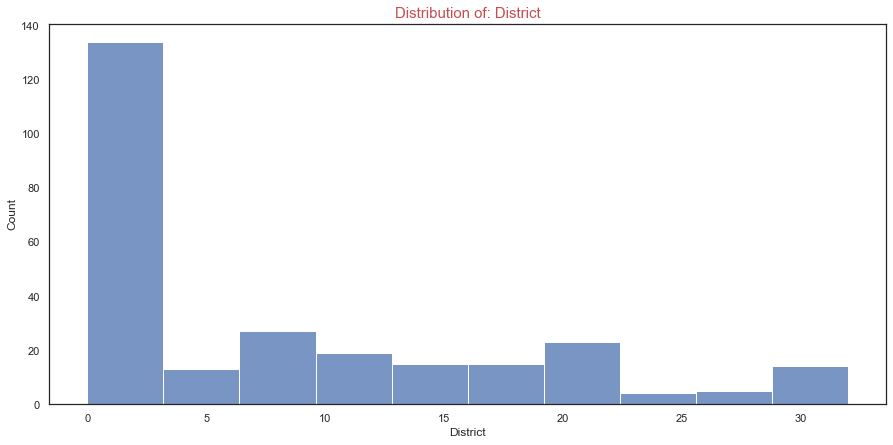

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Is Charter', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Is Charter')

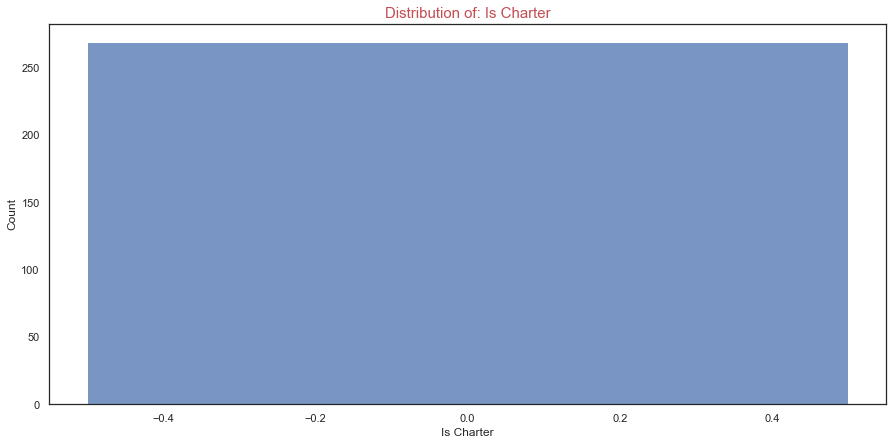

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Is Magnet', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Is Magnet')

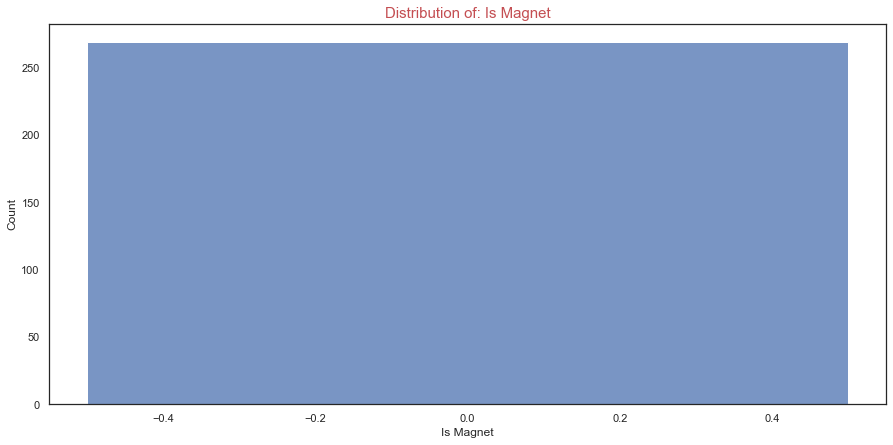

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Is Title I', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Is Title I')

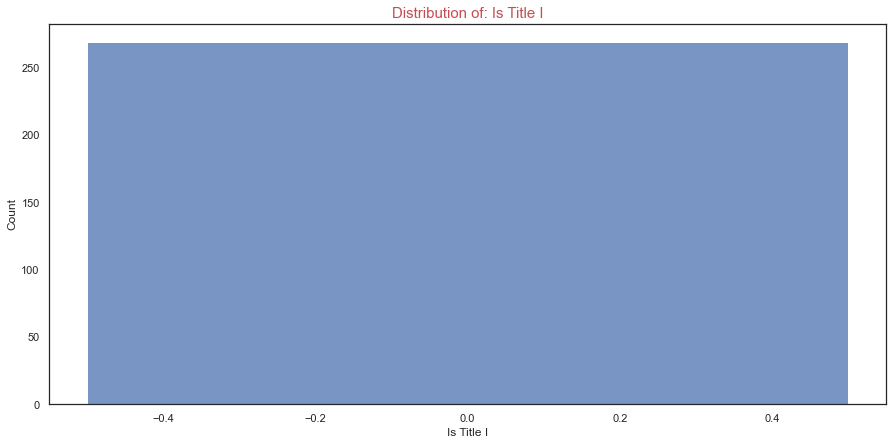

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Enrollment', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Enrollment')

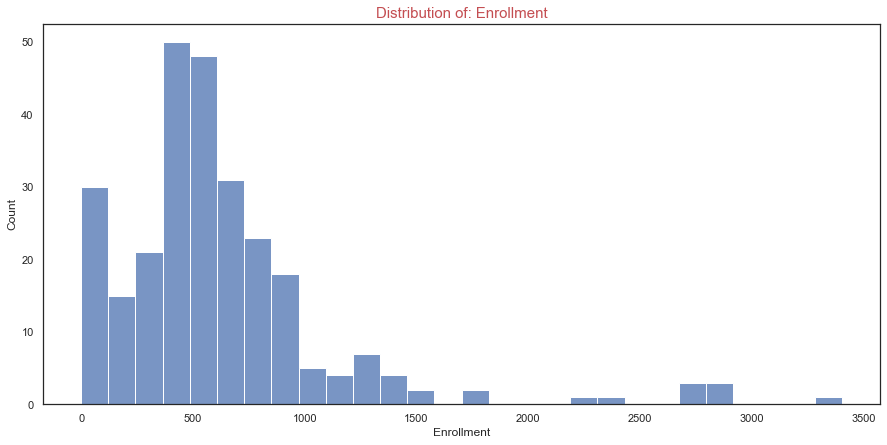

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Full-time Teachers', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Full-time Teachers')

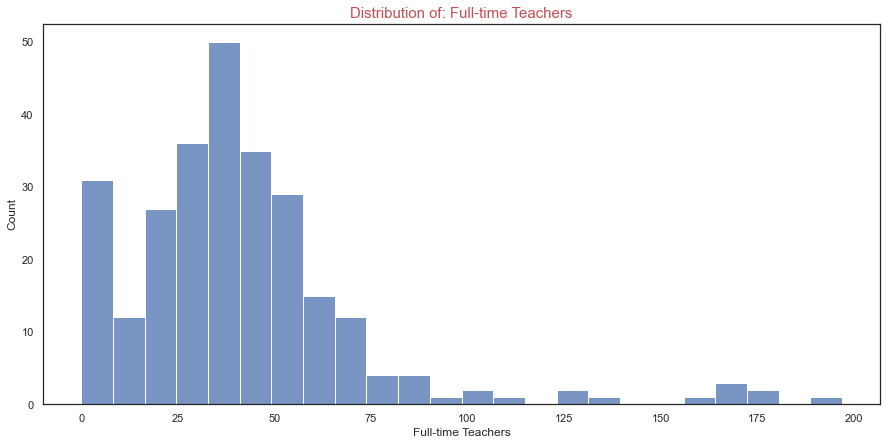

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Student/Teacher Ratio', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Student/Teacher Ratio')

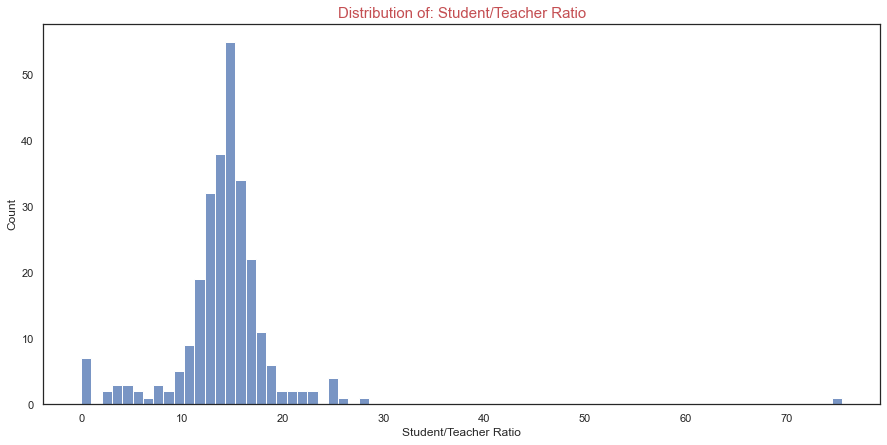

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Free/DiscountedLunch Recipients', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Free/DiscountedLunch Recipients')

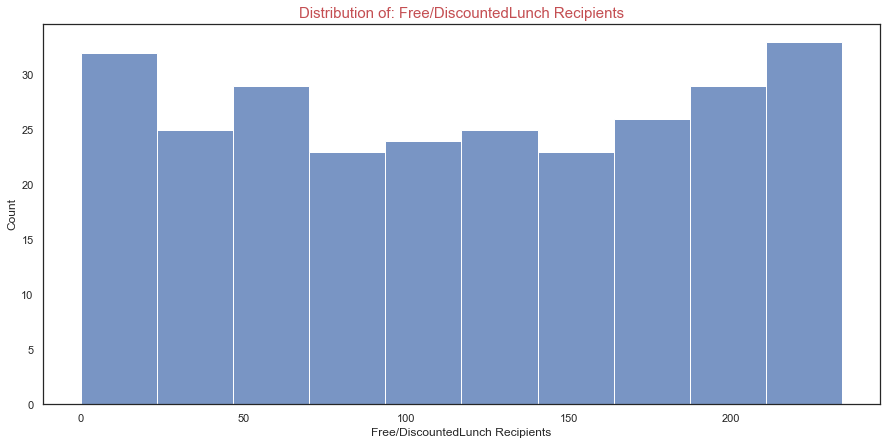

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='White', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: White')

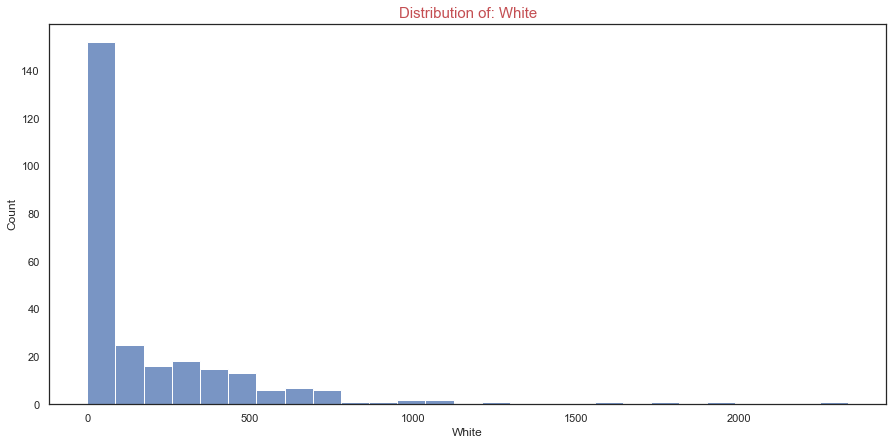

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Black', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Black')

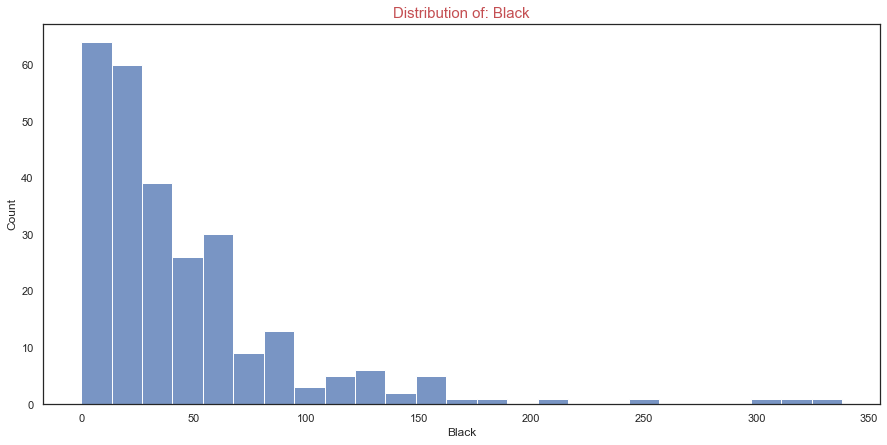

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Hispanic', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Hispanic')

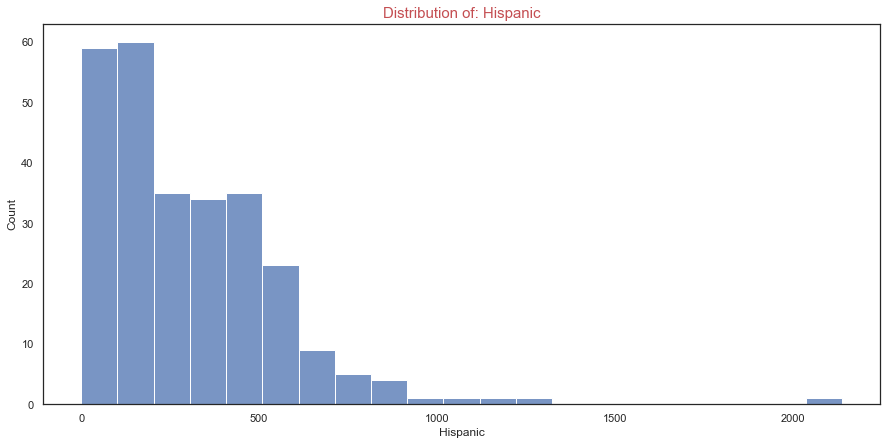

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Asian', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Asian')

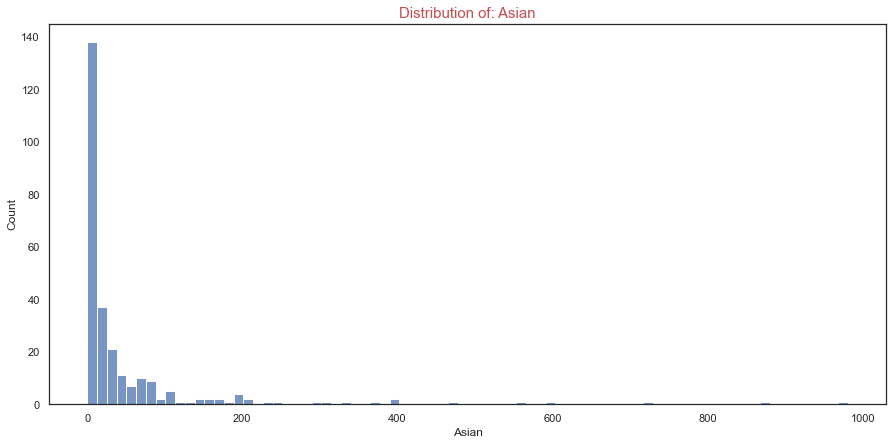

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='AmericanIndian', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: AmericanIndian')

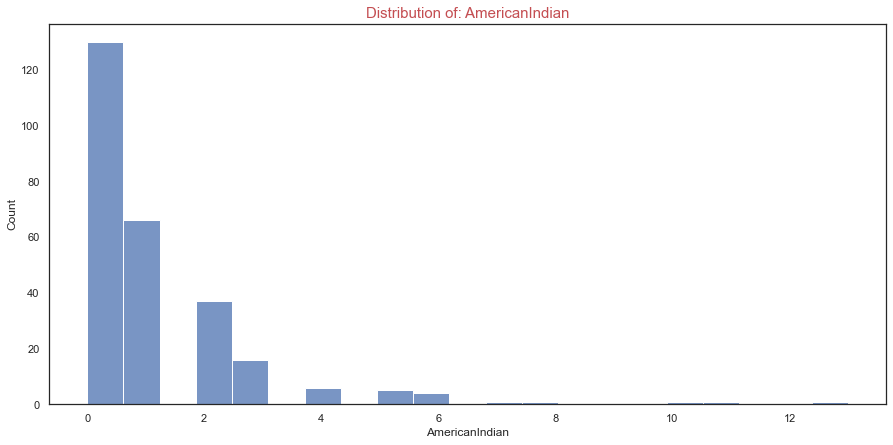

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='PacificIslander', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: PacificIslander')

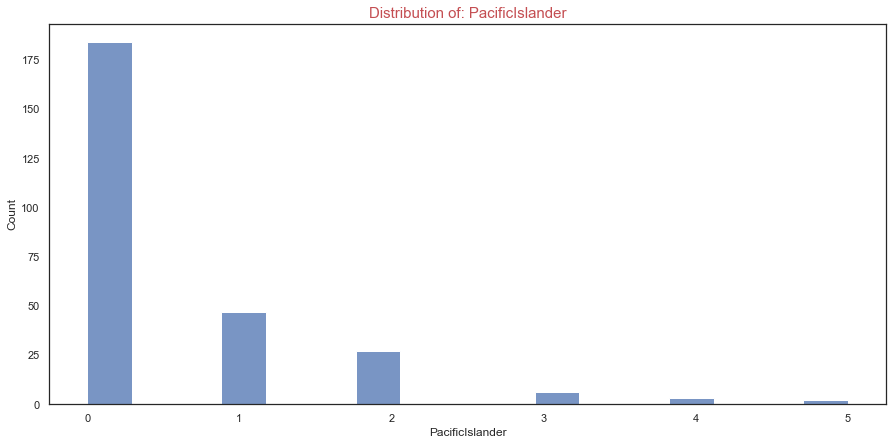

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Two orMore Races', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Two orMore Races')

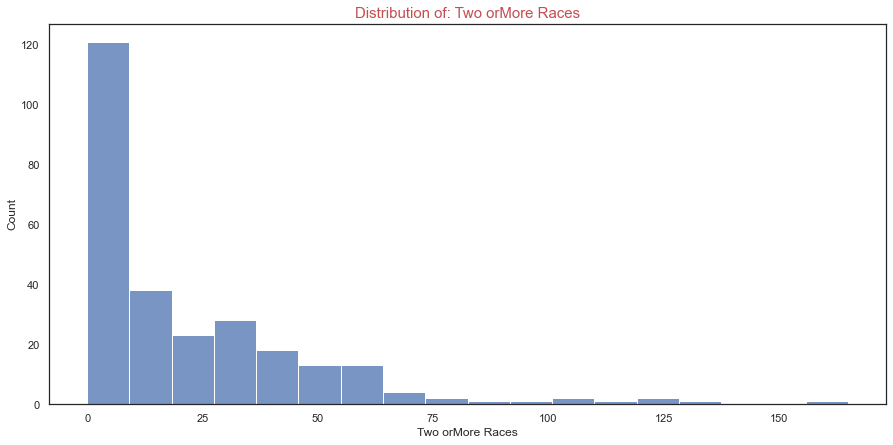

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Average Standard Score (2021)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Average Standard Score (2021)')

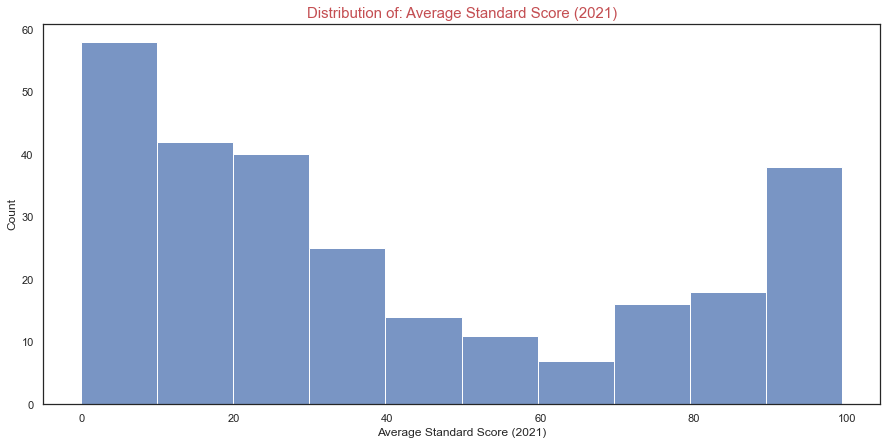

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Statewide Rank (2021)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Statewide Rank (2021)')

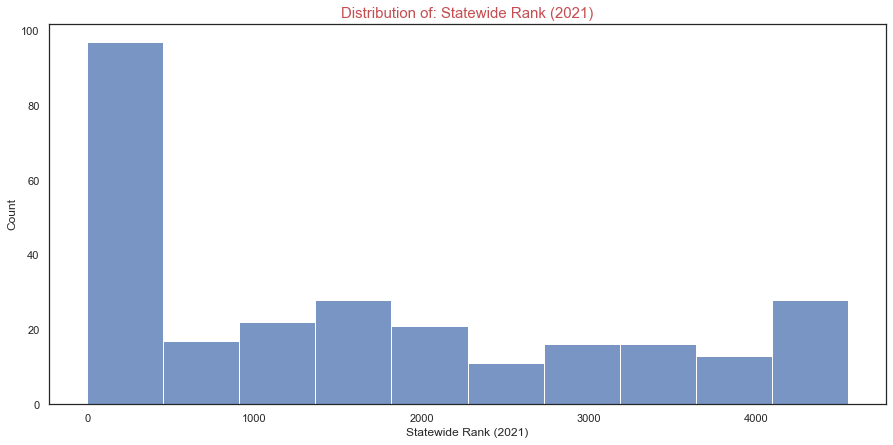

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='State Percentile (2021)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: State Percentile (2021)')

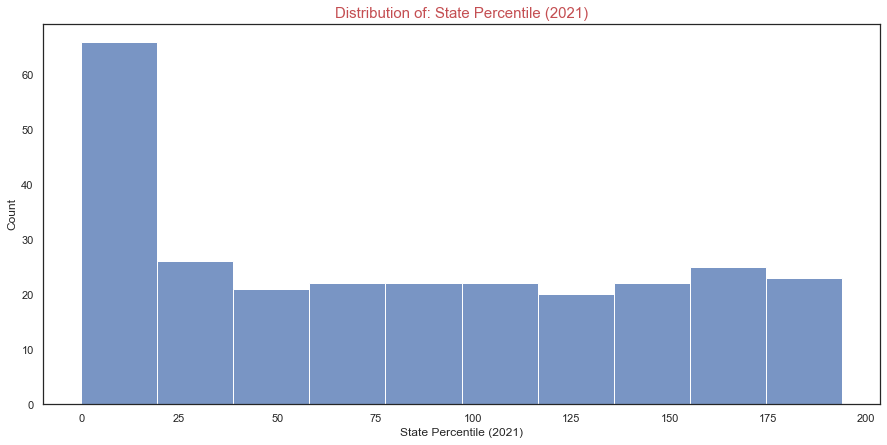

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Average Standard Score (2019)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Average Standard Score (2019)')

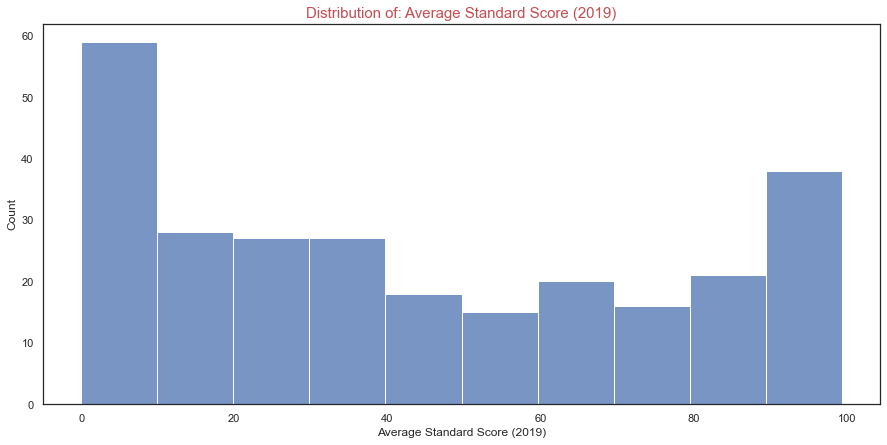

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Statewide Rank (2019)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Statewide Rank (2019)')

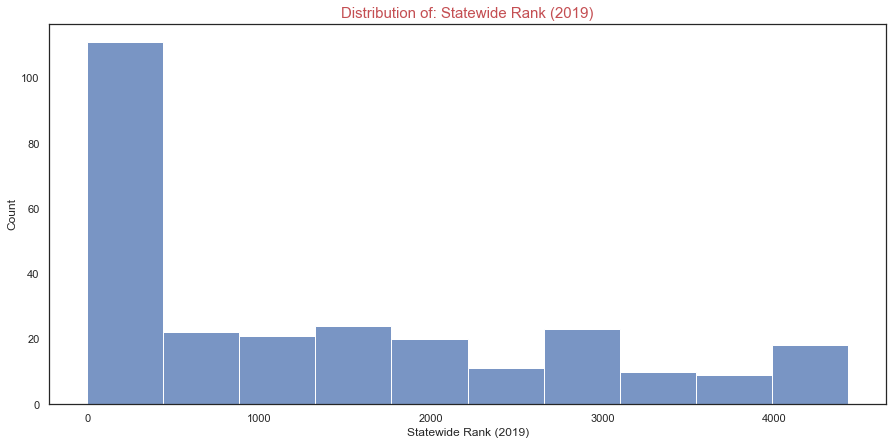

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='State Percentile (2019)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: State Percentile (2019)')

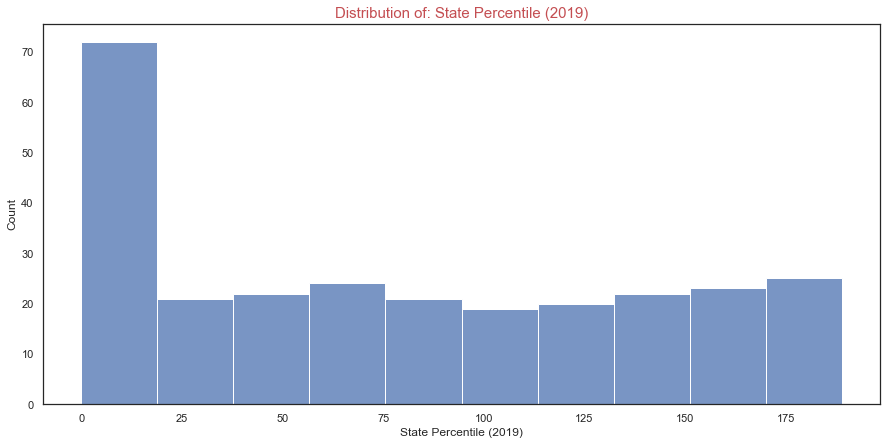

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Per Pupil Expenditures Total', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Per Pupil Expenditures Total')

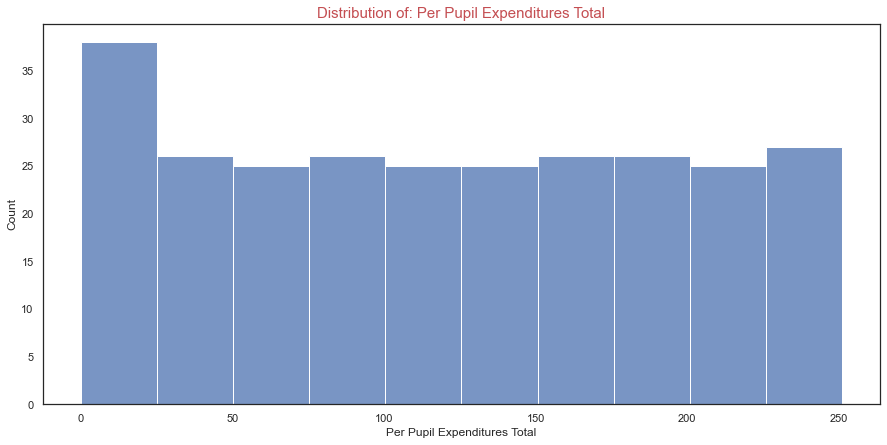

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Sub-total from Federal Funds', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Sub-total from Federal Funds')

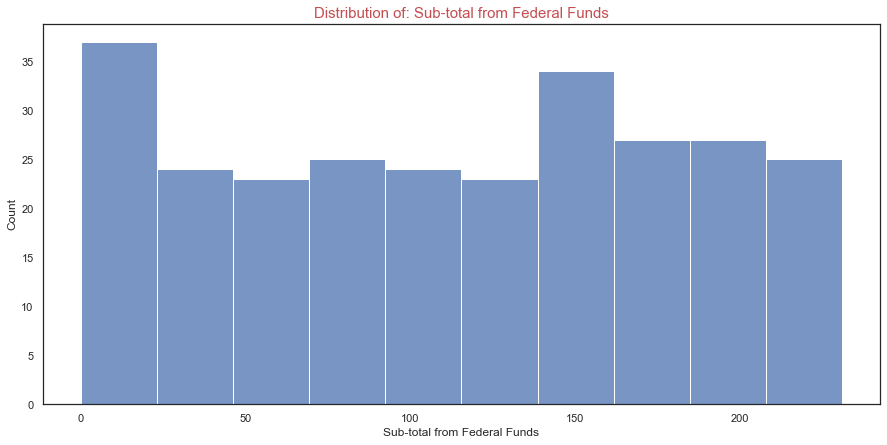

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Sub-total from State/Local Funds', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of: Sub-total from State/Local Funds')

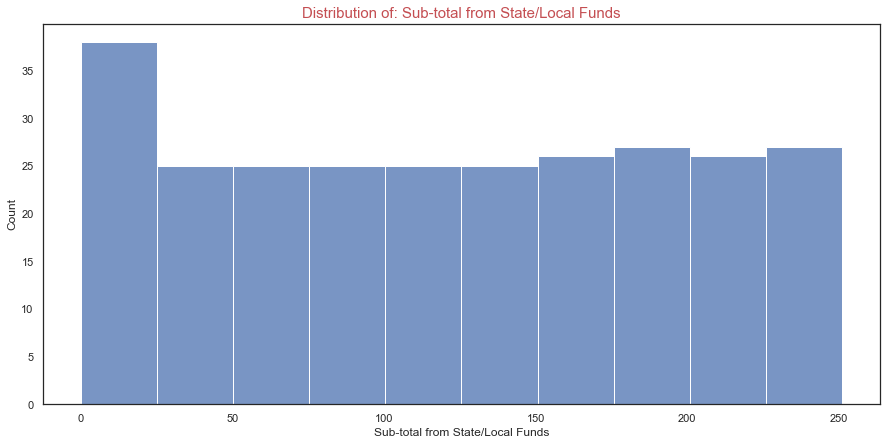

In [397]:
# display distribution chart for each feature and see if any outliers

sns.set(style='white')

for col in school.columns[7:]:
    plt.figure(figsize=(15,7))
    sns.histplot(data = school, x = col, color = 'b')
    plt.title(f'Distribution of: {col}', fontdict = {'color':'r','fontsize':15})
    plt.show();

#### Based on above charts we can see few features data are sckewed such as enrollment, student teachers ratio etc but we are not going to remove those since these are school students total and there can be school from high populated area where high enrollments and this is crititcal information in order to assess home price.

# END